## Data import

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os, shutil
!ls "/content/gdrive/My Drive/"

 8-2.mov
 Bayesian
 bq-results-20190920-004228-5xi034liest1
 bq-results-20190920-012138-er5eg3s9lxkj
 bq-results-20190920-012622-6g3qu1tkjun8
 bq-results-20191112-190906-w6n93g514345
'Chu Yu-resume.pdf'
'Colab Notebooks'
'data science final scratch.gdoc'
'Download eTranscripts ordered from your school (Windows) (1).gdoc'
 drug.csv
'epi assignment 5.gdoc'
 measure.csv
 my_model.h5
'Phar stats final SAP.gdoc'
 scudata
 sculpture


In [0]:
measure_df = pd.read_csv('/content/gdrive/My Drive/measure.csv')

In [0]:
measure_df.head(5)

,person_id,visit_occurrence_id,year_of_birth,gender_source_value,ethnicity_concept_id,person_source_value,month_of_birth,day_of_birth,ethnicity_source_value,location_id,race_concept_id,gender_concept_id,birth_datetime,race_source_value,death_date,death_datetime,death_type_concept_id,cause_source_concept_id,provider_id,visit_start_date,care_site_id,visit_source_value,visit_end_date,visit_start_datetime,visit_concept_id,visit_type_concept_id,visit_end_datetime,measurement_id,measurement_datetime,measurement_date,value_as_number,value_as_concept_id,measurement_concept_id,measurement_source_concept_id,unit_concept_id,measurement_source_value
0,5,4213630.0,1935,1,38003564,000308435E3E5B76,9,1,1,8,8557.0,8507,1935-09-01T00:00:00.000Z,1,NaN,NaN,NaN,NaN,68338.0,2009-01-09T00:00:00.000Z,2870.0,5.421323e+14,2009-01-09T00:00:00.000Z,2009-01-09T00:00:00.000Z,9202.0,44818517.0,2009-01-09T00:00:00.000Z,2659876.0,2012-07-03T15:42:00.000Z,2010-04-02T00:00:00.000Z,151.0,0.0,2212294.0,2212294.0,9514.0,82565
1,5,4213630.0,1935,1,38003564,000308435E3E5B76,9,1,1,8,8557.0,8507,1935-09-01T00:00:00.000Z,1,NaN,NaN,NaN,NaN,68338.0,2009-01-09T00:00:00.000Z,2870.0,5.421323e+14,2009-01-09T00:00:00.000Z,2009-01-09T00:00:00.000Z,9202.0,44818517.0,2009-01-09T00:00:00.000Z,790690.0,2016-02-23T00:00:00.000Z,2008-12-23T00:00:00.000Z,224.0,0.0,2212290.0,2212290.0,4118323.0,82550
2,5,4213630.0,1935,1,38003564,000308435E3E5B76,9,1,1,8,8557.0,8507,1935-09-01T00:00:00.000Z,1,NaN,NaN,NaN,NaN,68338.0,2009-01-09T00:00:00.000Z,2870.0,5.421323e+14,2009-01-09T00:00:00.000Z,2009-01-09T00:00:00.000Z,9202.0,44818517.0,2009-01-09T00:00:00.000Z,1109419.0,2012-11-13T00:00:00.000Z,2008-12-15T00:00:00.000Z,232.0,0.0,438857.0,44826972.0,8753.0,78191
3,5,4213630.0,1935,1,38003564,000308435E3E5B76,9,1,1,8,8557.0,8507,1935-09-01T00:00:00.000Z,1,NaN,NaN,NaN,NaN,68338.0,2009-01-09T00:00:00.000Z,2870.0,5.421323e+14,2009-01-09T00:00:00.000Z,2009-01-09T00:00:00.000Z,9202.0,44818517.0,2009-01-09T00:00:00.000Z,2261247.0,2013-03-17T00:00:00.000Z,2009-12-05T00:00:00.000Z,223.0,0.0,4034850.0,44835527.0,8862.0,V7260
4,5,4213630.0,1935,1,38003564,000308435E3E5B76,9,1,1,8,8557.0,8507,1935-09-01T00:00:00.000Z,1,NaN,NaN,NaN,NaN,68338.0,2009-01-09T00:00:00.000Z,2870.0,5.421323e+14,2009-01-09T00:00:00.000Z,2009-01-09T00:00:00.000Z,9202.0,44818517.0,2009-01-09T00:00:00.000Z,3587049.0,2012-07-03T11:45:00.000Z,2008-03-21T00:00:00.000Z,263.0,0.0,2212731.0,2212731.0,4118323.0,85610


## data preprocessing

In [0]:
persondrop = ['person_source_value','ethnicity_source_value', 'gender_source_value','location_id','birth_datetime', 'race_source_value', 'care_site_id', 'provider_id']
visitdrop = ['visit_source_value','visit_start_date','visit_end_date','visit_start_datetime','visit_end_datetime']
measuredrop = ['measurement_source_value', 'measurement_source_concept_id', 'measurement_date']

In [0]:
measure_df=measure_df.drop(columns='gender_source_value')

In [0]:
measure_df=measure_df.drop(columns=persondrop)
measure_df=measure_df.drop(columns=visitdrop)
measure_df=measure_df.drop(columns=measuredrop)

In [0]:
measure_df.loc[pd.isnull(measure_df['death_date']) , 'death'] = 0
measure_df.loc[pd.isnull(measure_df['death_date'])==False , 'death'] = 1

In [0]:
deathdrop=['death_date','death_datetime','death_type_concept_id','cause_source_concept_id']
measure_df=measure_df.drop(columns=deathdrop)

In [0]:
measure_df.head(5)

,person_id,visit_occurrence_id,year_of_birth,ethnicity_concept_id,month_of_birth,day_of_birth,race_concept_id,gender_concept_id,visit_concept_id,visit_type_concept_id,measurement_id,measurement_datetime,value_as_number,value_as_concept_id,measurement_concept_id,unit_concept_id,death
0,5,4213630.0,1935,38003564,9,1,8557.0,8507,9202.0,44818517.0,2659876.0,2012-07-03T15:42:00.000Z,151.0,0.0,2212294.0,9514.0,0.0
1,5,4213630.0,1935,38003564,9,1,8557.0,8507,9202.0,44818517.0,790690.0,2016-02-23T00:00:00.000Z,224.0,0.0,2212290.0,4118323.0,0.0
2,5,4213630.0,1935,38003564,9,1,8557.0,8507,9202.0,44818517.0,1109419.0,2012-11-13T00:00:00.000Z,232.0,0.0,438857.0,8753.0,0.0
3,5,4213630.0,1935,38003564,9,1,8557.0,8507,9202.0,44818517.0,2261247.0,2013-03-17T00:00:00.000Z,223.0,0.0,4034850.0,8862.0,0.0
4,5,4213630.0,1935,38003564,9,1,8557.0,8507,9202.0,44818517.0,3587049.0,2012-07-03T11:45:00.000Z,263.0,0.0,2212731.0,4118323.0,0.0


In [0]:
## change the types of columns
categorical= ['person_id','visit_occurrence_id','ethnicity_concept_id','race_concept_id','gender_concept_id',
             'visit_concept_id','visit_type_concept_id','measurement_id','measurement_concept_id',
             'value_as_concept_id','unit_concept_id']
for col in categorical:
    measure_df[col] = measure_df[col].astype('object')
measure_df['death'] = measure_df['death'].astype(int)

## exploration

In [0]:
percent_missing = measure_df.isnull().sum() * 100 / len(measure_df)
missing_value_df = pd.DataFrame({'column_name': measure_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
person_id,person_id,0.000000
visit_occurrence_id,visit_occurrence_id,0.000017
year_of_birth,year_of_birth,0.000000
ethnicity_concept_id,ethnicity_concept_id,0.000000
month_of_birth,month_of_birth,0.000000
day_of_birth,day_of_birth,0.000000
race_concept_id,race_concept_id,13.544205
gender_concept_id,gender_concept_id,0.000000
visit_concept_id,visit_concept_id,0.000017
visit_type_concept_id,visit_type_concept_id,0.000017


In [0]:
measure_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

person_id                   97918
visit_occurrence_id        943947
ethnicity_concept_id            2
race_concept_id                 6
gender_concept_id               2
visit_concept_id                3
visit_type_concept_id           1
measurement_id            2213395
measurement_datetime         3971
value_as_concept_id             1
measurement_concept_id       1019
unit_concept_id                32
dtype: int64

### Demographic information

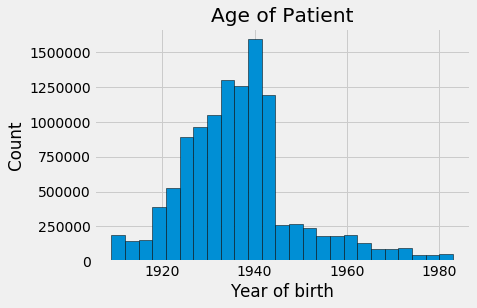

In [0]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(measure_df['year_of_birth'], edgecolor = 'k', bins = 25)
plt.title('Age of Patient'); plt.xlabel('Year of birth'); plt.ylabel('Count');

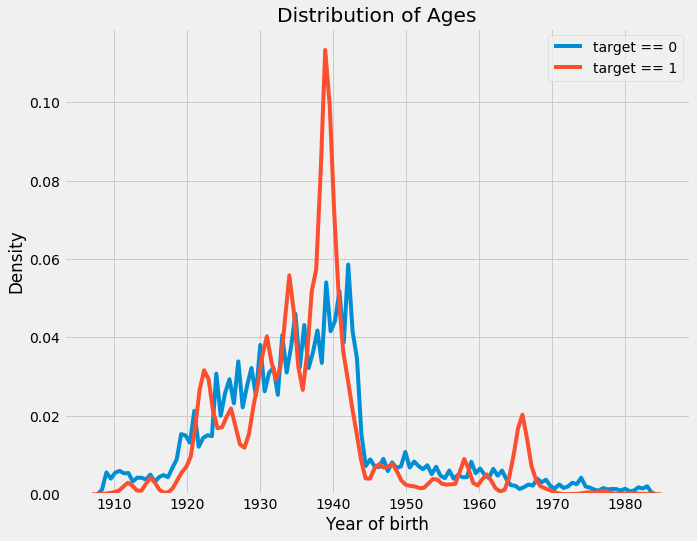

In [0]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(measure_df.loc[measure_df['death'] == 0, 'year_of_birth'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(measure_df.loc[measure_df['death'] == 1, 'year_of_birth'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Year of birth'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [0]:
# Age information into a separate dataframe
age_data = measure_df[['death', 'year_of_birth']]

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['year_of_birth'], bins = np.linspace(1900, 2000, num = 11))
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,death,year_of_birth
YEARS_BINNED,,
"(1900.0, 1910.0]",0.000769,1909.471426
"(1910.0, 1920.0]",0.004098,1916.659975
"(1920.0, 1930.0]",0.009183,1926.141644
"(1930.0, 1940.0]",0.015001,1935.860721
"(1940.0, 1950.0]",0.006678,1943.419201
"(1950.0, 1960.0]",0.005856,1955.275167
"(1960.0, 1970.0]",0.018415,1964.727143
"(1970.0, 1980.0]",0.001553,1974.768383
"(1980.0, 1990.0]",0.001690,1982.258666


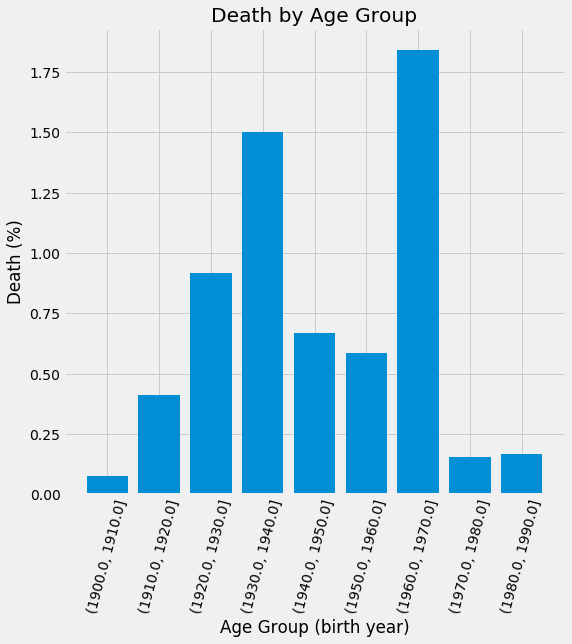

In [0]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['death'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (birth year)'); plt.ylabel('Death (%)')
plt.title('Death by Age Group');

In [0]:
# Age information into a separate dataframe
gender_data = measure_df[['death', 'gender_concept_id']]

# Bin the age data
gender_groups  = gender_data.groupby('gender_concept_id').mean()
gender_groups

,death
gender_concept_id,
8507,0.010211
8532,0.010584


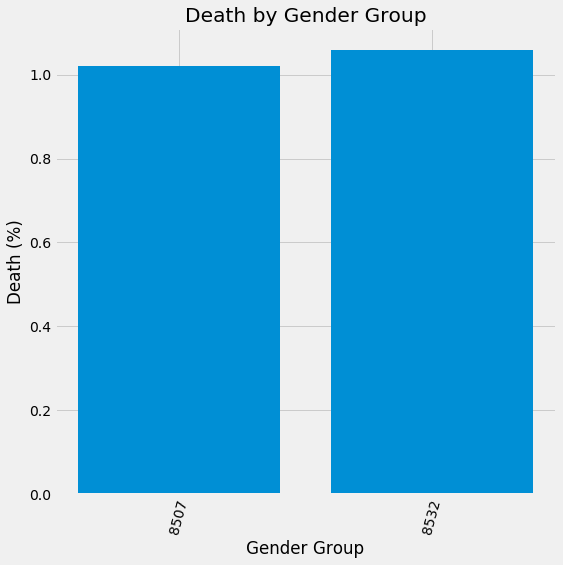

In [0]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(gender_groups.index.astype(str), 100 * gender_groups['death'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Gender Group'); plt.ylabel('Death (%)')
plt.title('Death by Gender Group');

### about measurement info

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


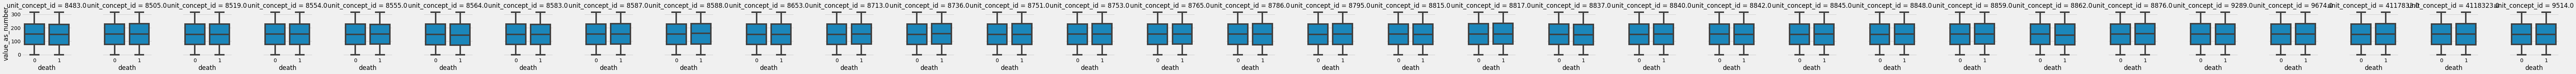

In [0]:
## for measurement value in each unit
g = sns.FacetGrid(measure_df, col='unit_concept_id')
g.map(sns.boxplot, 'death','value_as_number')

In [0]:
measure_df.loc[measure_df['value_as_number']> 100000 , 'value_as_number'] =None ##delete the extreme values

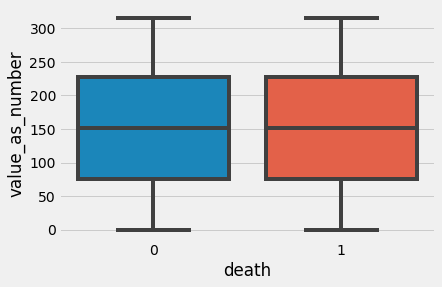

In [0]:
sns.boxplot(x = 'death', y = 'value_as_number', data = measure_df)

In [0]:
type(measure_df.measurement_datetime)

pandas.core.series.Series

In [0]:
measure_df['measure_date']= measure_df.measurement_datetime.dt.date

In [0]:
measure_df.to_csv("measure2.csv")

In [0]:
measure_df.value_as_number.head(50)

0     151.0
1     224.0
2     232.0
3     223.0
4     263.0
5     316.0
6       9.0
7     201.0
8      42.0
9     270.0
10    249.0
11    271.0
12    237.0
13    272.0
14    127.0
15     44.0
16    104.0
17    128.0
18     33.0
19     91.0
20    233.0
21     47.0
22     47.0
23    173.0
24    149.0
25    312.0
26    299.0
27    105.0
28     18.0
29    222.0
30    212.0
31     49.0
32    162.0
33    101.0
34    161.0
35      NaN
36     87.0
37    289.0
38     26.0
39    205.0
40     69.0
41     67.0
42    267.0
43    199.0
44    212.0
45    113.0
46    290.0
47     63.0
48     78.0
49      NaN
Name: value_as_number, dtype: float64